In [57]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [90]:
df = pd.read_csv("data/Indicadores_CEINS.csv")
ocupacion = df.loc[df['fecha'] >= '2013-01-01']
ocupacion['fecha'].min(), ocupacion['fecha'].max()
ocupacion.head()

,Hotel,fecha,occ,habs_disp,tp,po,pt,te
0,CEINS,2013-01-01,0.194969,159,1100.34,0.930938,1.15998,214.531
1,CEINS,2013-01-02,0.245283,159,1045.75,0.921469,1.12549,256.506
2,CEINS,2013-01-03,0.283019,159,1022.09,0.980766,1.03368,289.270
3,CEINS,2013-01-04,0.251572,159,1017.40,0.947943,1.10197,255.950
4,CEINS,2013-01-05,0.270440,159,1027.94,1.158630,1.10918,277.996


In [91]:
cols = ['Hotel','habs_disp','tp','po','pt','te']
ocupacion = ocupacion.drop(cols, axis=1)
ocupacion = ocupacion.sort_values('fecha')
ocupacion.isnull().sum()
ocupacion.head()

,fecha,occ
0,2013-01-01,0.194969
1,2013-01-02,0.245283
2,2013-01-03,0.283019
3,2013-01-04,0.251572
4,2013-01-05,0.270440


In [92]:
ocupacion = ocupacion.groupby('fecha')['occ'].sum().reset_index()

In [93]:
ocupacion['fecha']=pd.to_datetime(ocupacion['fecha'])
ocupacion = ocupacion.set_index('fecha')
ocupacion.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2018-08-04', '2018-08-05', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-11',
               '2018-08-12', '2018-08-13'],
              dtype='datetime64[ns]', name='fecha', length=2051, freq=None)

In [134]:
y = ocupacion

In [95]:
y['2017':]

,occ
fecha,
2017-01-01,0.220126
2017-01-02,0.207547
2017-01-03,0.264151
2017-01-04,0.377358
2017-01-05,0.314465
2017-01-06,0.201258
2017-01-07,0.251572
2017-01-08,0.339623
2017-01-09,0.622642


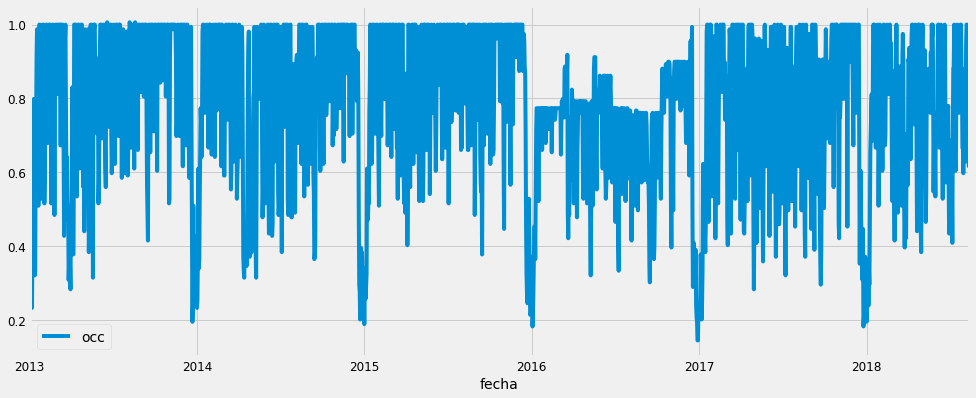

In [96]:
y.plot(figsize=(15, 6))
plt.show()

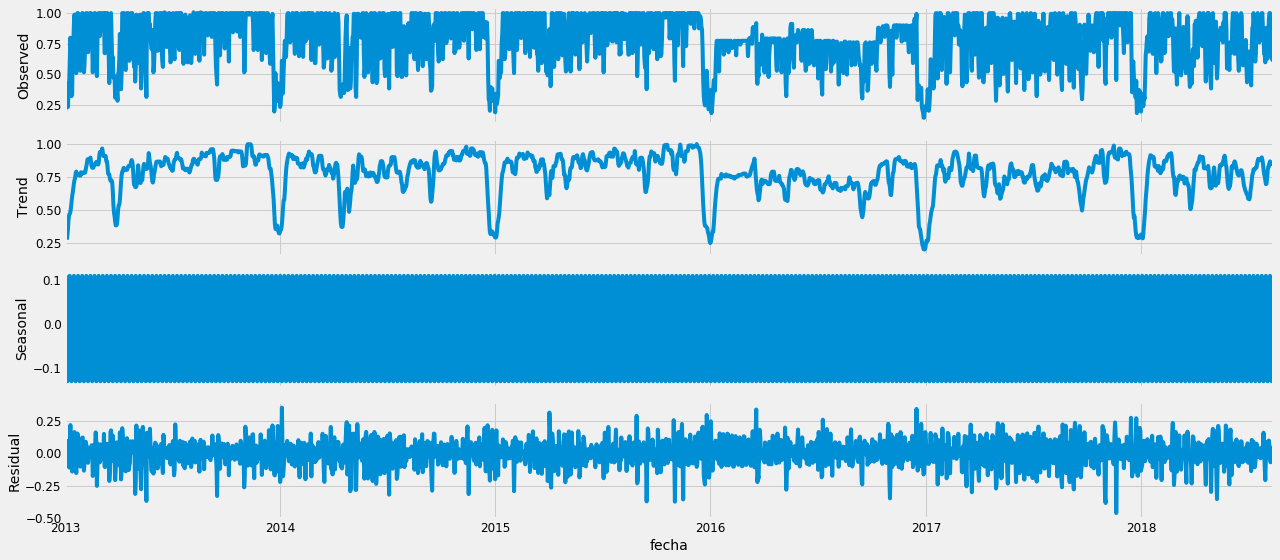

In [97]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [98]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [99]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4932.750118479033
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2977.596664277832
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:465.95110704549705
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-616.2218193976216
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:413.3692072638993
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-610.6709515645368
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:265.09458779835296
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-657.342590558073
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2524.395656547878
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1094.0974346104208
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-705.1008852335543
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-1839.0267885373078
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-790.3456982503486
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-1843.3583483247694
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-984.5408693344757
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-1860.6561233379632
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-1923.6718367359372
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-1947.761311

In [100]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6933      0.017     41.307      0.000       0.660       0.726
ma.L1         -1.0000      2.479     -0.403      0.687      -5.859       3.859
ar.S.L12      -0.3949      0.021    -18.605      0.000      -0.436      -0.353
sigma2         0.0349      0.087      0.403      0.687      -0.135       0.205


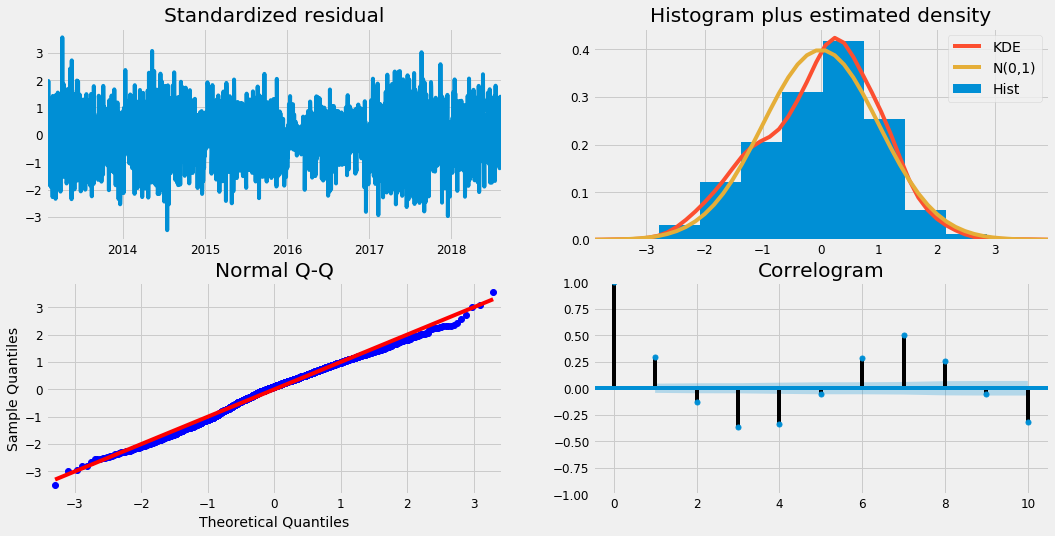

In [101]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

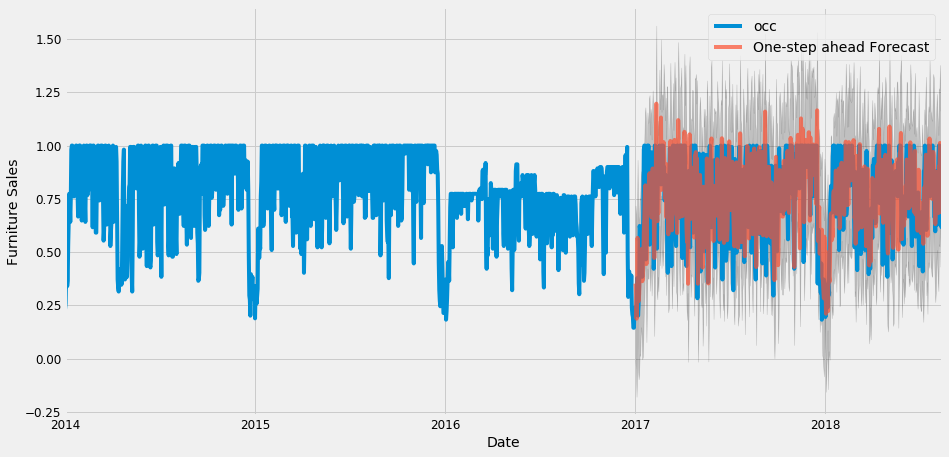

In [103]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [119]:
y_forecasted = pd.DataFrame(pred.predicted_mean,columns=['occ'])
y_truth = y['2017-01-01':]
mse = ((y_forecasted[['occ']]-y_truth[['occ']])**2).mean()
#mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is occ    0.04
dtype: float64


In [120]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is occ    0.21
dtype: float64


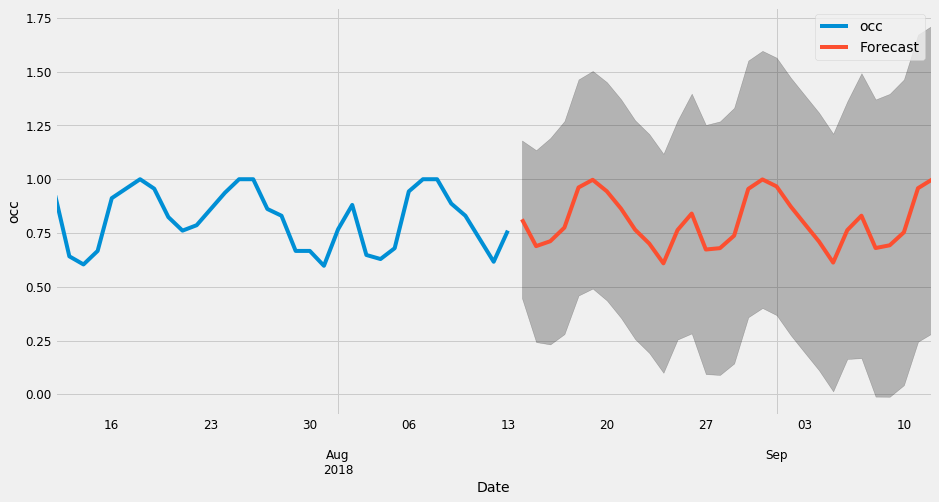

In [137]:
y2=y[2018:]
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('occ')
plt.legend()
plt.show()

In [131]:
pred_uc.predicted_mean

2018-08-14    0.813650
2018-08-15    0.688997
2018-08-16    0.711698
2018-08-17    0.774938
2018-08-18    0.961689
2018-08-19    0.997379
2018-08-20    0.943737
2018-08-21    0.863507
2018-08-22    0.765162
2018-08-23    0.700796
2018-08-24    0.609010
2018-08-25    0.763758
2018-08-26    0.840429
2018-08-27    0.673184
2018-08-28    0.679523
2018-08-29    0.737696
2018-08-30    0.955037
2018-08-31    0.999003
2018-09-01    0.966556
2018-09-02    0.873312
2018-09-03    0.791456
2018-09-04    0.710291
2018-09-05    0.612532
2018-09-06    0.763296
2018-09-07    0.830481
2018-09-08    0.680056
2018-09-09    0.692857
2018-09-10    0.753031
2018-09-11    0.958292
2018-09-12    0.998990
Freq: D, dtype: float64